In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/MyDrive/Master_Data_Science/Proyecto_DS/Datasets/elementos_principales_4.csv')

In [5]:
df.head()

,Unnamed: 0,SSN,Latitude,Longitude,Site,Country,EC,EC class,M3 P,M3 P class,M3 K,M3 K class,PH,PH class,Acidified nitrogen,Acidified nitrogen class,Acidified carbon,Acidified carbon class
0,0,icr025136,-6.851620,34.243313,Itende,Tanzania,0.024,no salino,7.130,1.0,74.0,2.0,7.010,3.0,0.019436,1.0,0.947609,2.0
1,1,icr068579,11.280658,8.166768,Pampaida,Nigeria,0.043,no salino,1.980,1.0,71.4,2.0,5.880,2.0,0.023258,1.0,0.388742,1.0
2,2,icr048978,-29.972100,22.710200,Prieska,South Africa,0.142,no salino,6.280,1.0,129.0,3.0,8.580,4.0,0.061207,2.0,0.246237,1.0
3,3,icr056481,-16.066365,28.326498,Monga,Zambia,0.025,no salino,1.260,1.0,46.8,2.0,6.280,2.0,0.045499,1.0,0.694822,2.0
4,4,icr034190,8.158693,9.930640,Ibi,Nigeria,0.044,no salino,9.342,2.0,92.8,2.0,6.707,3.0,0.058520,2.0,0.558029,2.0


In [6]:
df.columns

Index(['Unnamed: 0', 'SSN', 'Latitude', 'Longitude', 'Site', 'Country', 'EC',
       'EC class', 'M3 P', 'M3 P class', 'M3 K', 'M3 K class', 'PH',
       'PH class', 'Acidified nitrogen', 'Acidified nitrogen class',
       'Acidified carbon', 'Acidified carbon class'],
      dtype='object')

In [7]:
num_vars = ['EC', 'M3 P', 'M3 K', 'PH', 'Acidified nitrogen', 'Acidified carbon']

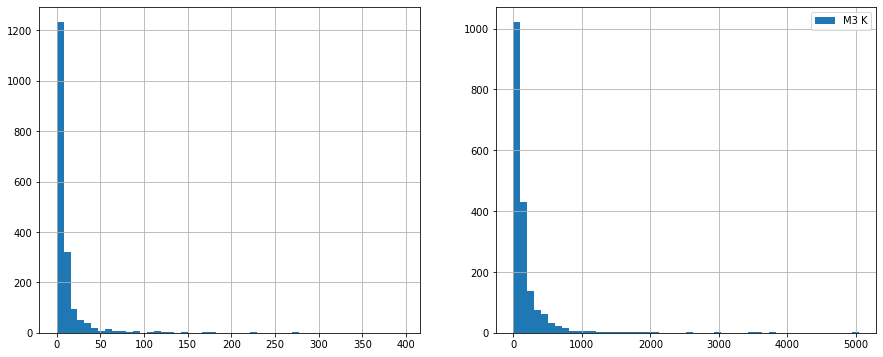

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
df['M3 P'].hist(bins=50,label='M3 P',alpha=1, ax=ax[0])
df['M3 K'].hist(bins=50,label='M3 K',alpha=1, ax=ax[1])
plt.legend()

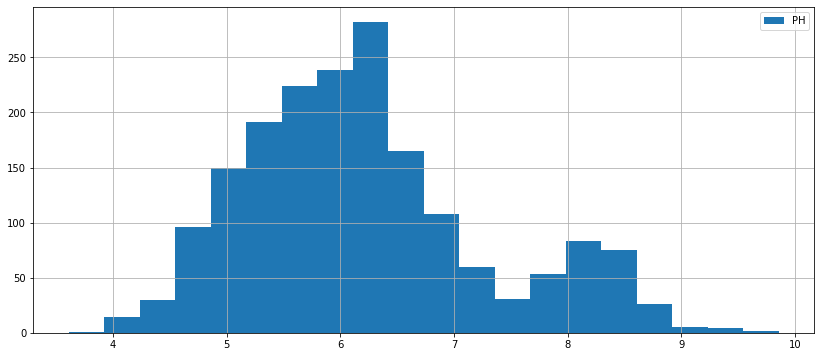

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
df['PH'].hist(bins=20,label='PH',alpha=1, ax=ax)
plt.legend()

No handles with labels found to put in legend.


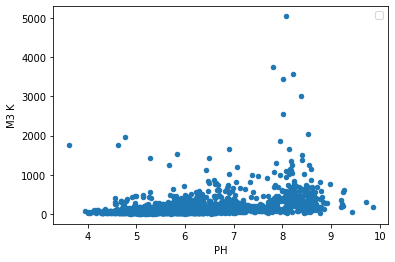

In [10]:
df[['PH', 'M3 K']].plot.scatter('PH', 'M3 K')
plt.legend()

No handles with labels found to put in legend.


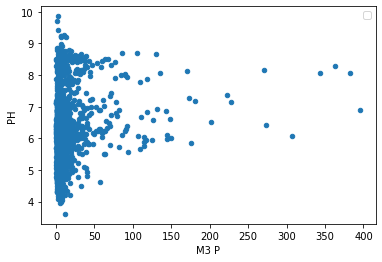

In [11]:
df[['M3 P', 'PH']].plot.scatter('M3 P', 'PH')
plt.legend()

No handles with labels found to put in legend.


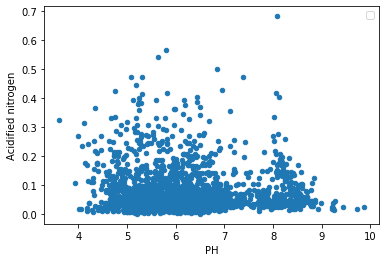

In [12]:
df[['PH', 'Acidified nitrogen']].plot.scatter('PH', 'Acidified nitrogen')
plt.legend()

No handles with labels found to put in legend.


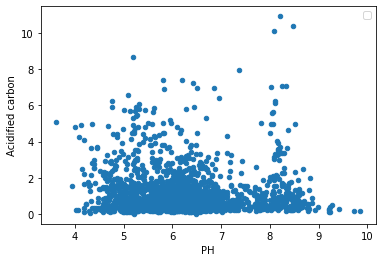

In [13]:
df[['PH', 'Acidified carbon']].plot.scatter('PH', 'Acidified carbon')
plt.legend()

In [14]:
print(df['M3 P'].nunique())
df['M3 K'].nunique()

1324


1308

In [15]:
import seaborn as sns 

EC
M3 P
M3 K
PH
Acidified nitrogen
Acidified carbon


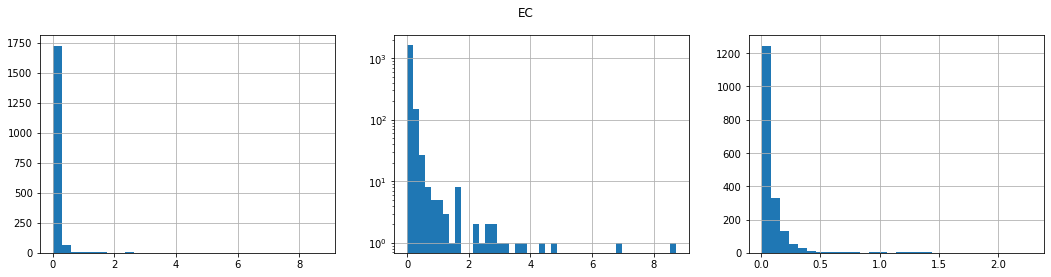

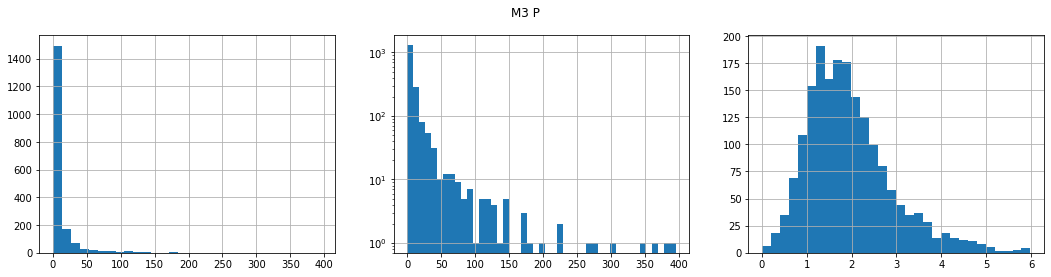

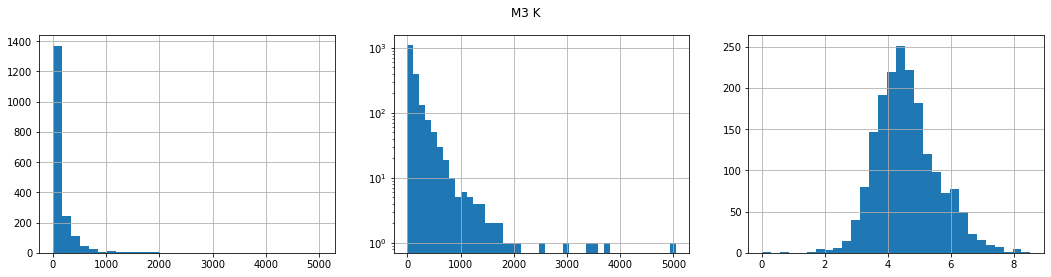

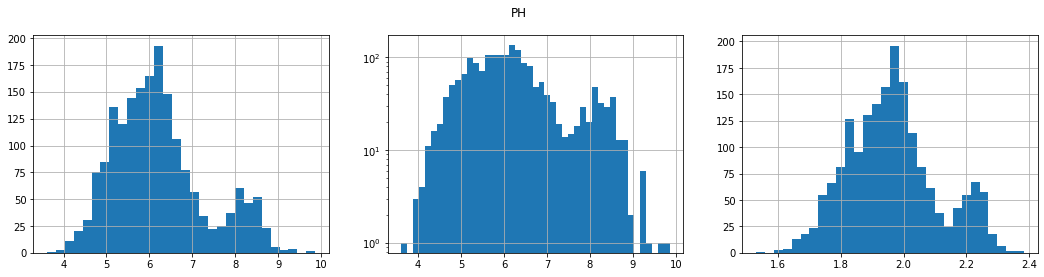

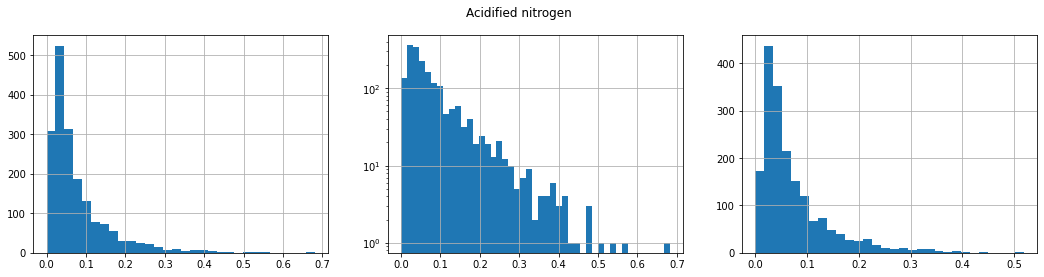

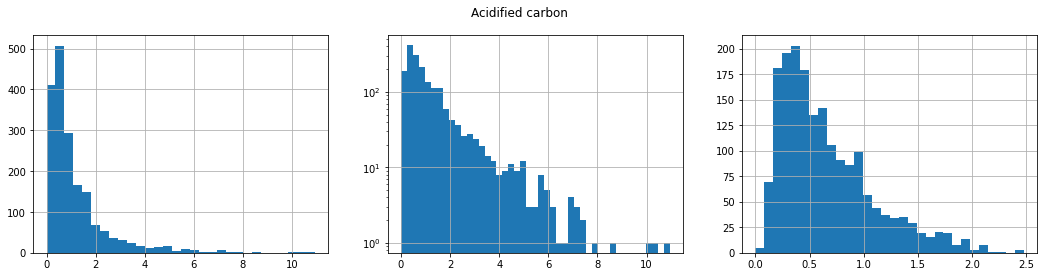

In [16]:
for var in num_vars:
  print(var)
#  display(df[var].describe())
  fig, ax = plt.subplots(1,3,figsize=(18,4))
  df[var].hist(bins=30, ax=ax[0])
  df[var].hist(bins=45, log=True, ax=ax[1])
  np.log(df[var]+1).hist(bins=30,ax=ax[2])
  plt.suptitle(var)

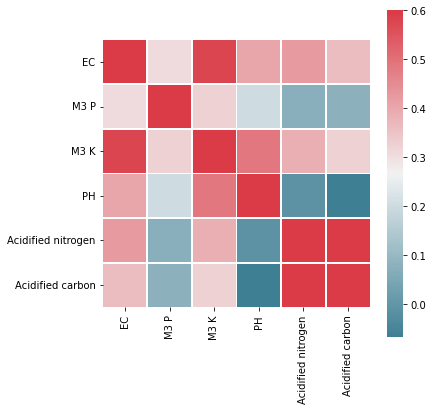

In [22]:
# Compute the correlation matrix
corr = df[num_vars].corr(method='spearman') # Pearson (linear), Spearman (non linear)

f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmax=0.6,
            square=True, linewidths=.5)

In [18]:
corr

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
EC,1.000000,0.308562,0.581443,0.405866,0.427583,0.360964
M3 P,0.308562,1.000000,0.325333,0.202715,0.074089,0.080087
M3 K,0.581443,0.325333,1.000000,0.489328,0.389029,0.326496
PH,0.405866,0.202715,0.489328,1.000000,-0.010882,-0.065514
Acidified nitrogen,0.427583,0.074089,0.389029,-0.010882,1.000000,0.946050
Acidified carbon,0.360964,0.080087,0.326496,-0.065514,0.946050,1.000000


In [20]:
df_reduced = df[['EC', 'M3 P', 'M3 K', 'PH', 'Acidified nitrogen', 'Acidified carbon']]

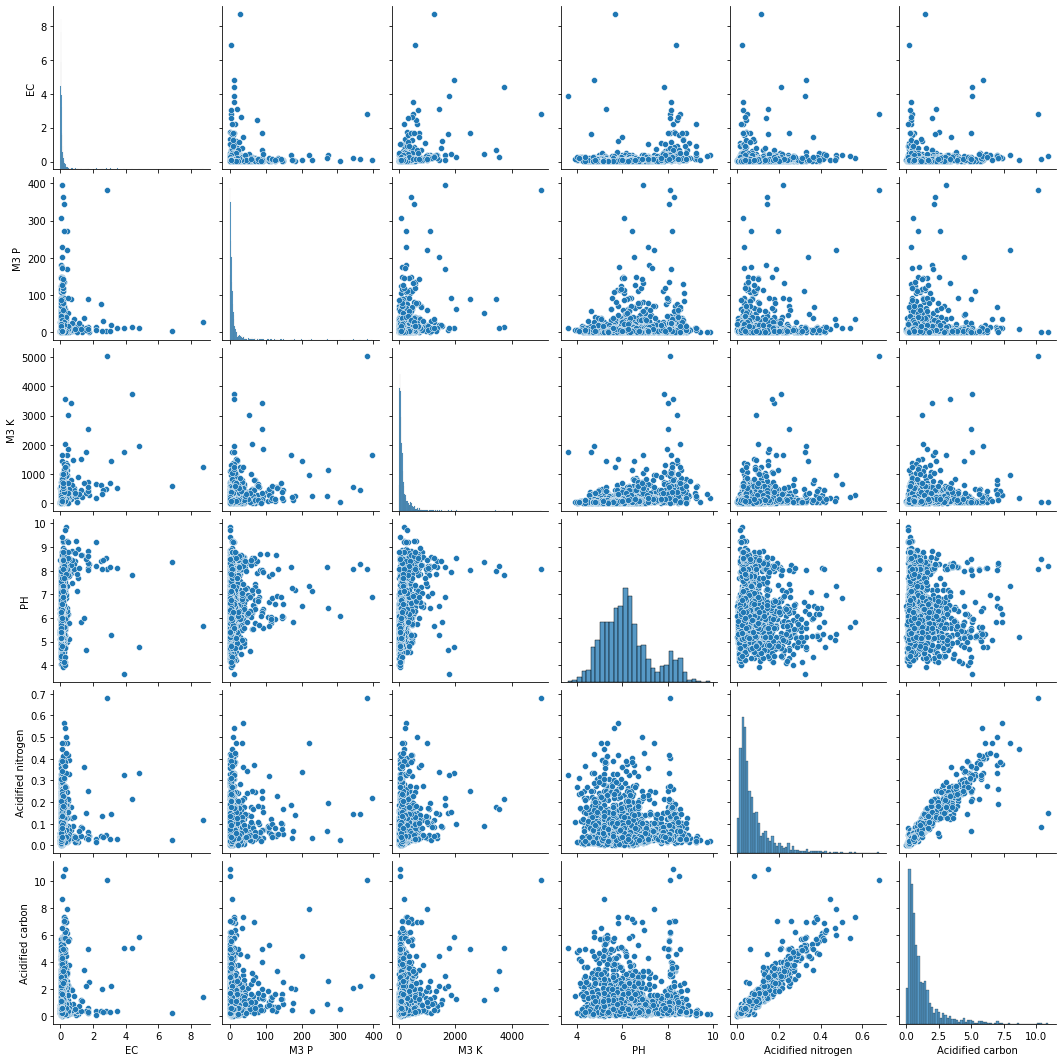

In [21]:
sns.pairplot(df_reduced)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
df.columns

Index(['Unnamed: 0', 'SSN', 'Latitude', 'Longitude', 'Site', 'Country', 'EC',
       'EC class', 'M3 P', 'M3 P class', 'M3 K', 'M3 K class', 'PH',
       'PH class', 'Acidified nitrogen', 'Acidified nitrogen class',
       'Acidified carbon', 'Acidified carbon class'],
      dtype='object')

In [25]:
selected_features = df.drop(columns={'SSN'}).columns

In [26]:
df.drop(columns={'SSN'}).columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Site', 'Country', 'EC',
       'EC class', 'M3 P', 'M3 P class', 'M3 K', 'M3 K class', 'PH',
       'PH class', 'Acidified nitrogen', 'Acidified nitrogen class',
       'Acidified carbon', 'Acidified carbon class'],
      dtype='object')

In [27]:
selected_features = df.drop(columns={'Unnamed: 0','SSN', 'Latitude', 'Longitude', 'Site', 'Country',
       'EC class', 'M3 P class', 'M3 K class',
       'PH class', 'Acidified nitrogen class', 'Acidified carbon class'}).columns

In [28]:
df.loc[:, selected_features].head()

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
0,0.024,7.130,74.0,7.010,0.019436,0.947609
1,0.043,1.980,71.4,5.880,0.023258,0.388742
2,0.142,6.280,129.0,8.580,0.061207,0.246237
3,0.025,1.260,46.8,6.280,0.045499,0.694822
4,0.044,9.342,92.8,6.707,0.058520,0.558029


In [29]:
# Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

In [30]:
# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [34]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [35]:
clustering_data.head()

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
0,-0.995873,-0.963995,-0.970676,0.08800,-0.942946,-0.826671
1,-0.991518,-0.990005,-0.971706,-0.27360,-0.931727,-0.928894
2,-0.968822,-0.968288,-0.948881,0.59040,-0.820331,-0.954960
3,-0.995644,-0.993641,-0.981455,-0.14560,-0.866439,-0.872909
4,-0.991288,-0.952823,-0.963226,-0.00896,-0.828217,-0.897930


In [37]:
clustering_data = clustering_data.drop([1823], axis=0)

In [38]:
clustering_data.iloc[1768]

EC                   NaN
M3 P                 NaN
M3 K                 NaN
PH                   NaN
Acidified nitrogen   NaN
Acidified carbon     NaN
Name: 1768, dtype: float64

In [39]:
clustering_data = clustering_data.drop([1372,1505,1768], axis=0)

## **KMEANS**

In [40]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=666)
km = km.fit(clustering_data)
km

KMeans(n_clusters=3, random_state=666)

In [ ]:
clustering_data.head()

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
0,-0.995873,-0.963995,-0.970676,0.08800,-0.942946,-0.826671
1,-0.991518,-0.990005,-0.971706,-0.27360,-0.931727,-0.928894
2,-0.968822,-0.968288,-0.948881,0.59040,-0.820331,-0.954960
3,-0.995644,-0.993641,-0.981455,-0.14560,-0.866439,-0.872909
4,-0.991288,-0.952823,-0.963226,-0.00896,-0.828217,-0.897930


In [ ]:
km.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'feature_names_in_', 'n_features_in_', '_n_init', '_tol', '_algorithm', '_n_threads', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

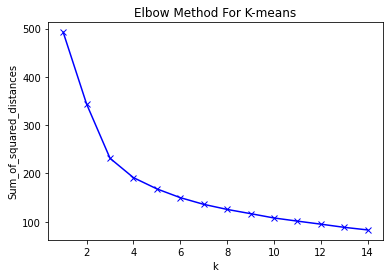

In [41]:
from sklearn.cluster import KMeans
distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=666)
    km = km.fit(clustering_data)
    distances.append(km.inertia_)
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For K-means')
plt.show()

In [42]:
# Define the number of clusters
n_clusters = 3

In [43]:
# Create the clustering algorithm
clustering = KMeans(n_clusters = n_clusters, random_state=666)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [44]:
cluster_labels

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [46]:
clustering_data.head(5)

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
0,-0.995873,-0.963995,-0.970676,0.08800,-0.942946,-0.826671
1,-0.991518,-0.990005,-0.971706,-0.27360,-0.931727,-0.928894
2,-0.968822,-0.968288,-0.948881,0.59040,-0.820331,-0.954960
3,-0.995644,-0.993641,-0.981455,-0.14560,-0.866439,-0.872909
4,-0.991288,-0.952823,-0.963226,-0.00896,-0.828217,-0.897930


In [47]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [48]:
clustering_data.head()

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon,cluster
0,-0.995873,-0.963995,-0.970676,0.08800,-0.942946,-0.826671,Cluster 1
1,-0.991518,-0.990005,-0.971706,-0.27360,-0.931727,-0.928894,Cluster 2
2,-0.968822,-0.968288,-0.948881,0.59040,-0.820331,-0.954960,Cluster 1
3,-0.995644,-0.993641,-0.981455,-0.14560,-0.866439,-0.872909,Cluster 2
4,-0.991288,-0.952823,-0.963226,-0.00896,-0.828217,-0.897930,Cluster 2


In [49]:
clustering_data['cluster'].value_counts()

Cluster 2    1244
Cluster 1     383
Cluster 3     208
Name: cluster, dtype: int64

## **Clustering Explanation**

In [50]:
from scipy import stats

In [51]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [52]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [57]:
mean_data

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon
cluster,,,,,,
Cluster 1,0.255442,17.505214,303.953564,7.383107,0.069537,0.974093
Cluster 2,0.076132,10.064960,117.792213,5.885152,0.058194,0.867940
Cluster 3,0.229712,17.263038,265.143380,5.978832,0.215735,3.312534


In [56]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Cluster 1,Cluster 2,Cluster 3
Acidified carbon,62.000000,57.000000,94.000000
Acidified nitrogen,63.000000,56.000000,94.000000
EC,93.000000,65.000000,91.000000
M3 K,87.000000,62.000000,85.000000
M3 P,86.000000,75.000000,86.000000
PH,85.000000,42.000000,46.000000


In [54]:
selected_features

Index(['EC', 'M3 P', 'M3 K', 'PH', 'Acidified nitrogen', 'Acidified carbon'], dtype='object')

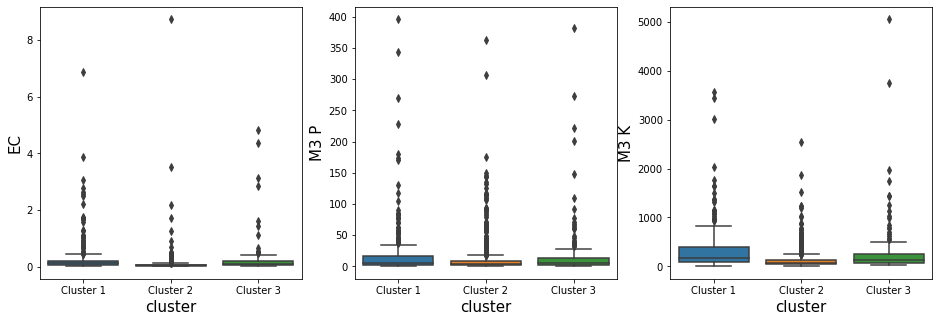

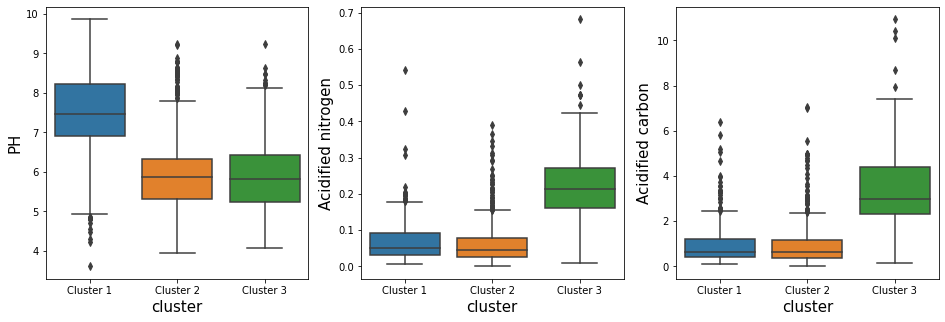

In [58]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
for i,col in enumerate(selected_features[:3]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()
fig, ax = plt.subplots(1,3,figsize=(16,5))
for i,col in enumerate(selected_features[3:6]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()

In [60]:
original_data.head()

,EC,M3 P,M3 K,PH,Acidified nitrogen,Acidified carbon,cluster
0,0.024,7.130,74.0,7.010,0.019436,0.947609,Cluster 1
1,0.043,1.980,71.4,5.880,0.023258,0.388742,Cluster 2
2,0.142,6.280,129.0,8.580,0.061207,0.246237,Cluster 1
3,0.025,1.260,46.8,6.280,0.045499,0.694822,Cluster 2
4,0.044,9.342,92.8,6.707,0.058520,0.558029,Cluster 2


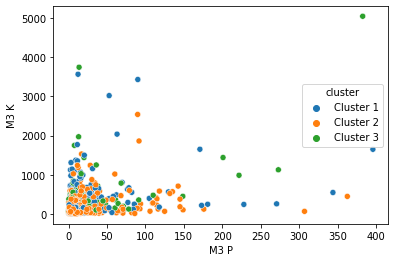

In [61]:
sns.scatterplot(data=original_data, x="M3 P", y="M3 K", hue="cluster")

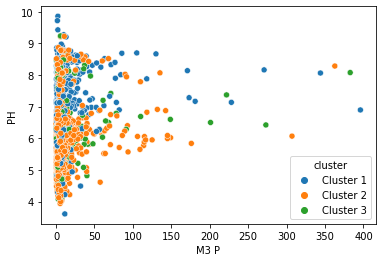

In [62]:
sns.scatterplot(data=original_data, x="M3 P", y="PH", hue="cluster")

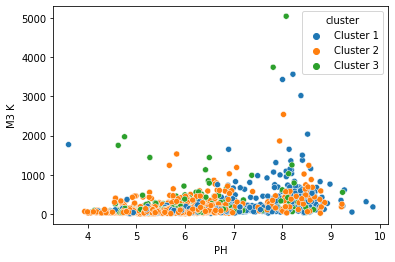

In [63]:
sns.scatterplot(data=original_data, x="PH", y="M3 K", hue="cluster")

## **AgglomerativeClustering**

In [64]:
from  sklearn.cluster import AgglomerativeClustering

In [65]:
# Filter the selected data for clustering
clustering_data = df.loc[:, selected_features].copy()

# Prepare the original dataset to 
original_data = df.loc[:, selected_features].copy()

In [66]:
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
clustering_data = pd.DataFrame(min_max_scaler.fit_transform(clustering_data),columns = original_data.columns)

In [67]:
clustering_data.iloc[1823]

EC                   NaN
M3 P                 NaN
M3 K                 NaN
PH                   NaN
Acidified nitrogen   NaN
Acidified carbon     NaN
Name: 1823, dtype: float64

In [68]:
clustering_data = clustering_data.drop([1372,1505,1768,1823], axis=0)

In [69]:
K = 3
km = AgglomerativeClustering(n_clusters=3)
km = km.fit(clustering_data)

In [70]:
# Define the number of clusters
n_clusters = 3

In [71]:
# Create the clustering algorithm
clustering = AgglomerativeClustering(n_clusters = n_clusters)

# Fit the clustering
cluster_labels = clustering.fit_predict(clustering_data)

In [72]:
clustering_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))
original_data['cluster'] = 'Cluster ' + pd.Series((clustering.labels_ + 1).astype(str))

In [73]:
clustering_data['cluster'].value_counts()

Cluster 1    1327
Cluster 2     271
Cluster 3     237
Name: cluster, dtype: int64

## **Clustering Explanation**

In [74]:
# Fix the number of cuts selected per feature
selected_cuts = 100

In [75]:
def color_explanation(cut, factor=1):
    palette = sns.color_palette('Blues', selected_cuts).as_hex()
    return f'background-color: {palette[int(factor*cut - 1)]}'

In [76]:
mean_data = original_data.groupby('cluster').mean()
feature_explanation = pd.DataFrame()

# Translate to the selected number of cuts
for feature in mean_data.columns:    
    feature_values = pd.Series(data=None, index=mean_data.index)
    xx = original_data[feature]
    for cluster in mean_data.index:                
        percentile = stats.percentileofscore(xx, mean_data[feature][cluster])
        cut = np.ceil((percentile / 100) * selected_cuts)
        if cut == 0:
            cut = 1
        feature_values[cluster] = cut
    feature_explanation[feature] = feature_values
# Final reshaping
feature_explanation = feature_explanation.T
feature_explanation.index.name = None
feature_explanation.columns.name = None

# Final sorting
feature_explanation = feature_explanation.sort_index()

# Final explanation (indexed)
feature_explanation.style.applymap(color_explanation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Cluster 1,Cluster 2,Cluster 3
Acidified carbon,57.000000,91.000000,62.000000
Acidified nitrogen,56.000000,91.000000,63.000000
EC,63.000000,93.000000,94.000000
M3 K,61.000000,88.000000,88.000000
M3 P,71.000000,92.000000,83.000000
PH,45.000000,58.000000,87.000000


In [77]:
selected_features

Index(['EC', 'M3 P', 'M3 K', 'PH', 'Acidified nitrogen', 'Acidified carbon'], dtype='object')

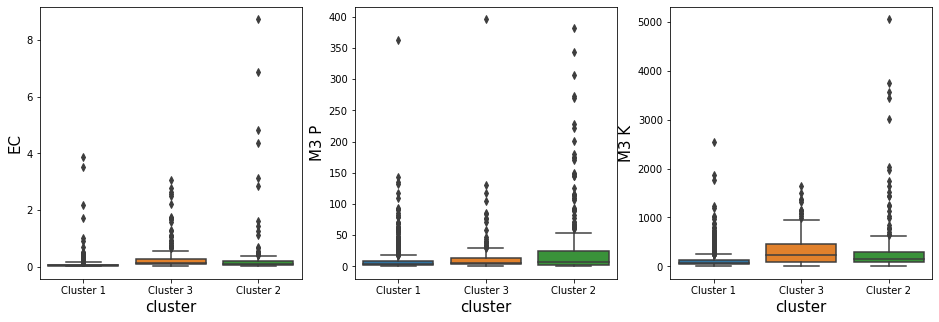

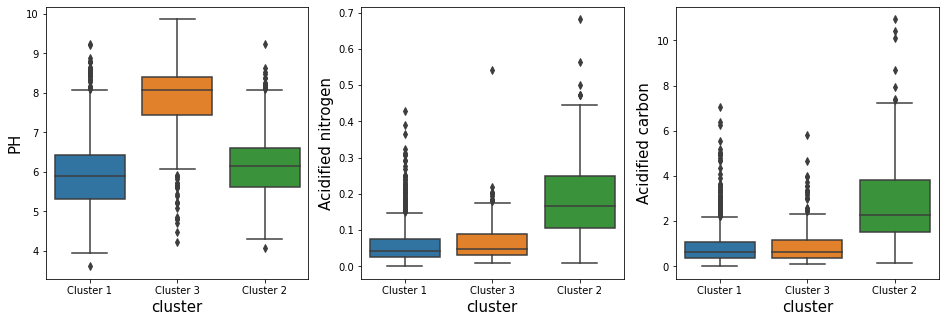

In [78]:
fig, ax = plt.subplots(1,3,figsize=(16,5))
for i,col in enumerate(selected_features[:3]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()
fig, ax = plt.subplots(1,3,figsize=(16,5))
for i,col in enumerate(selected_features[3:6]):
    sns.boxplot(x="cluster", y=col, data=original_data, ax=ax[i])  # RUN PLOT   
    ax[i].set_xlabel('cluster',fontsize=15)
    ax[i].set_ylabel(col,fontsize=15)
plt.show()